In [58]:
# dataset ref: https://github.com/Te-k/malware-classification
# dataset is generated using pefile
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [59]:
np.random.seed(7)
# load the dataset
dataframe = pd.read_csv('data.csv', sep='|')

In [60]:
print(dataframe.columns)
print('dataframe shape: ',dataframe.shape)
dataframe.describe()

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [61]:
dataX = dataframe.iloc[: , 2:-1]
dataY = dataframe.iloc[:,-1]

# Normalization
tfr = MinMaxScaler()
tfr.fit(dataX)
dataX = tfr.transform(dataX)
print('Sample shape ', dataX.shape)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=42)


Sample shape  (138047, 54)


In [62]:
# Build a logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

/home/on3p/.virtualenvs/p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Build a neural network
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.optimizers import RMSprop
history = History()

model_nn = Sequential()
model_nn.add(Dense(128, input_dim=dataX.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
opt = RMSprop(learning_rate = 0.001)    

model_nn.compile(loss='mse',
              optimizer=opt,
              metrics=['accuracy'])

history = model_nn.fit(X_train, y_train,
                      epochs=20,batch_size=128, 
                        callbacks=[history], validation_data=(X_test, y_test))

score = model_nn.evaluate(X_test, y_test_nn, batch_size=128)

Train on 96632 samples, validate on 41415 samples
Epoch 1/20
96632/96632 [==============================] - 1s 14us/step - loss: 0.0284 - accuracy: 0.9660 - val_loss: 0.0150 - val_accuracy: 0.9811
Epoch 2/20
96632/96632 [==============================] - 1s 12us/step - loss: 0.0141 - accuracy: 0.9831 - val_loss: 0.0119 - val_accuracy: 0.9854
Epoch 3/20
96632/96632 [==============================] - 1s 13us/step - loss: 0.0125 - accuracy: 0.9851 - val_loss: 0.0112 - val_accuracy: 0.9867
Epoch 4/20
96632/96632 [==============================] - 1s 13us/step - loss: 0.0116 - accuracy: 0.9862 - val_loss: 0.0112 - val_accuracy: 0.9867
Epoch 5/20
96632/96632 [==============================] - 1s 13us/step - loss: 0.0113 - accuracy: 0.9866 - val_loss: 0.0109 - val_accuracy: 0.9867
Epoch 6/20
96632/96632 [==============================] - 1s 14us/step - loss: 0.0110 - accuracy: 0.9869 - val_loss: 0.0106 - val_accuracy: 0.9871
Epoch 7/20
96632/96632 [==============================] - 1s 13us/st

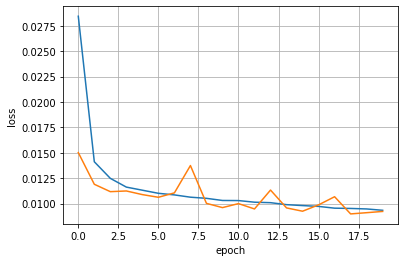

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

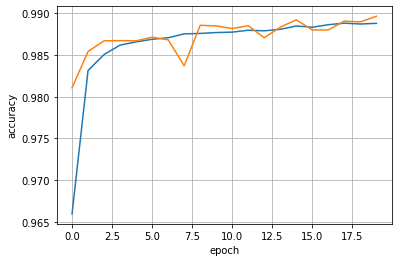

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [66]:
# evaluate logistic regression model
lr_test_pred = model_logistic.predict(X_test)

print('logistic regression model confusion matrix on testing set')
print(confusion_matrix(y_test, lr_test_pred))
print('logistic regression model accuracy: ', accuracy_score(y_test, lr_test_pred))

# evaluate ANN 
nn_test_predict = model_nn.predict(X_test)

nn_test_predict[ nn_test_predict < 0.5 ] = 0
nn_test_predict[ nn_test_predict >= 0.5 ] = 1
print('ANN model confusion matrix on testing set')
print(confusion_matrix(y_test, nn_test_predict))
print('logistic regression model accuracy: ', accuracy_score(y_test, nn_test_predict))

logistic regression model confusion matrix on testing set
[[28453   481]
 [  628 11853]]
logistic regression model accuracy:  0.9732222624652903
ANN model confusion matrix on testing set
[[28659   275]
 [  154 12327]]
logistic regression model accuracy:  0.9896414342629483
